In [1]:
from pylab import *

In [2]:
from classy import *

Version:  0.0.68


In [3]:
data = load_csv('data/wine.csv')

178 vectors of length 13
Feature names: 'Alcalinity of ash', 'Alcohol', 'Ash', 'Color intensity', 'Flavanoids', 'Hue', 'Magnesium', 'Malic acid', 'Nonflavanoid phenols', 'OD280/OD315 of diluted wines', 'Proanthocyanins', 'Proline', 'Total phenols'
Target values given.
Target names: '1', '2', '3'
Mean:  [1.94949438e+01 1.30006180e+01 2.36651685e+00 5.05808988e+00
 2.02926966e+00 9.57449438e-01 9.97415730e+01 2.33634831e+00
 3.61853933e-01 2.61168539e+00 1.59089888e+00 7.46893258e+02
 2.29511236e+00]
Median:  [1.950e+01 1.305e+01 2.360e+00 4.690e+00 2.135e+00 9.650e-01 9.800e+01
 1.865e+00 3.400e-01 2.780e+00 1.555e+00 6.735e+02 2.355e+00]
Stddev:  [3.33016976e+00 8.09542915e-01 2.73572294e-01 2.31176466e+00
 9.96048950e-01 2.27928607e-01 1.42423077e+01 1.11400363e+00
 1.24103260e-01 7.07993265e-01 5.70748849e-01 3.14021657e+02
 6.24090564e-01]


In [4]:
data.vectors.shape

(178, 13)

In [5]:
data.target_names

[1, 2, 3]

In [6]:
data.feature_names

array(['Alcalinity of ash', 'Alcohol', 'Ash', 'Color intensity',
       'Flavanoids', 'Hue', 'Magnesium', 'Malic acid',
       'Nonflavanoid phenols', 'OD280/OD315 of diluted wines',
       'Proanthocyanins', 'Proline', 'Total phenols'], dtype=object)

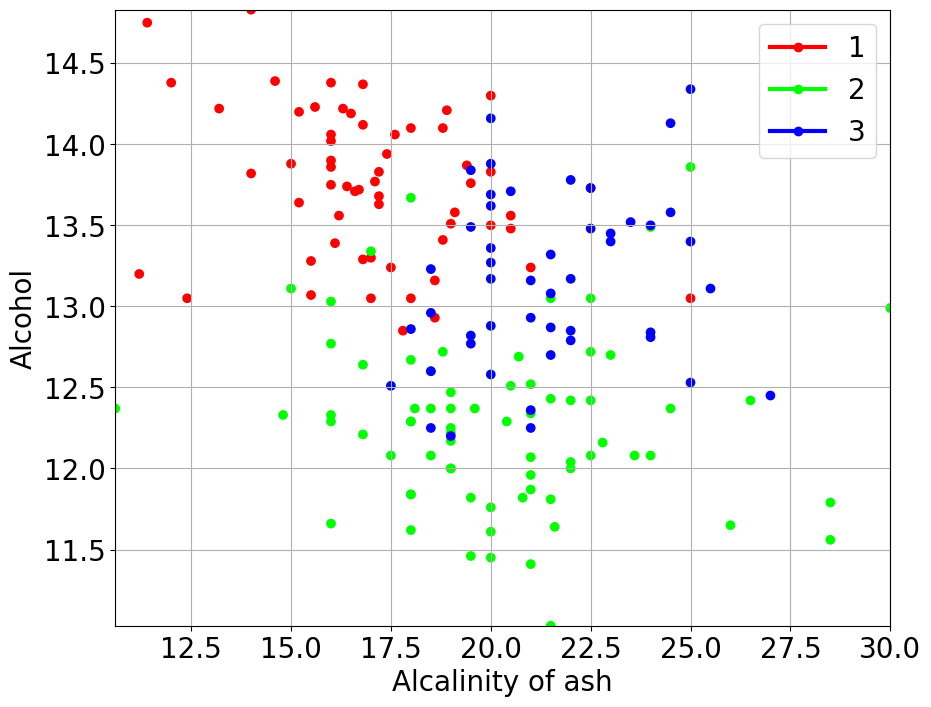

In [7]:
subset=extract_features(data,[0,1])
plot2D(subset)

# Naive Bayes

In [8]:
C=NaiveBayes()

In [9]:
data_train,data_test=split(data,test_size=0.3)

Original vector shape:  (178, 13)
Train vector shape:  (124, 13)
Test vector shape:  (54, 13)


In [10]:
%%time
C.fit(data_train.vectors,data_train.targets)

CPU times: user 978 μs, sys: 295 μs, total: 1.27 ms
Wall time: 1.02 ms


In [11]:
print('train: ', C.percent_correct(data_train.vectors,data_train.targets))
print('test: ', C.percent_correct(data_test.vectors,data_test.targets))

train:  72.58064516129032
test:  70.37037037037037


In [12]:
C.means

array([[1.66179487e+01, 1.37776923e+01, 2.43102564e+00, 5.42794872e+00,
        2.96076923e+00, 1.06025641e+00, 1.04641026e+02, 2.03410256e+00,
        2.85384615e-01, 3.10205128e+00, 1.87076923e+00, 1.12030769e+03,
        2.82230769e+00],
       [2.01571429e+01, 1.23282143e+01, 2.23321429e+00, 3.07910714e+00,
        2.07875000e+00, 1.06767857e+00, 9.45357143e+01, 1.97678571e+00,
        3.62321429e-01, 2.81321429e+00, 1.65107143e+00, 5.22928571e+02,
        2.28571429e+00],
       [2.16034483e+01, 1.31455172e+01, 2.44000000e+00, 7.39034483e+00,
        7.84827586e-01, 6.72068966e-01, 9.81724138e+01, 3.39551724e+00,
        4.61379310e-01, 1.66413793e+00, 1.16000000e+00, 6.12068966e+02,
        1.64689655e+00]])

# KNN

In [13]:
C = kNearestNeighbor(k=3)

In [14]:
%%time
C.fit(data_train.vectors,data_train.targets)

CPU times: user 870 μs, sys: 1.41 ms, total: 2.28 ms
Wall time: 4.33 ms


In [15]:
print('train: ', C.percent_correct(data_train.vectors,data_train.targets))
print('test: ', C.percent_correct(data_test.vectors,data_test.targets))

train:  83.87096774193549
test:  68.51851851851852


# CSC

In [16]:
C = CSC()

In [17]:
%%time
C.fit(data_train.vectors,data_train.targets)

CPU times: user 24.3 ms, sys: 2.91 ms, total: 27.2 ms
Wall time: 24.8 ms


In [18]:
print('train: ', C.percent_correct(data_train.vectors,data_train.targets))
print('test: ', C.percent_correct(data_test.vectors,data_test.targets))

train:  100.0
test:  72.22222222222221


In [19]:
C.centers

array([[1.550e+01, 1.328e+01, 2.840e+00, 4.600e+00, 2.680e+00, 1.090e+00,
        1.100e+02, 1.640e+00, 3.400e-01, 2.780e+00, 1.360e+00, 8.800e+02,
        2.600e+00],
       [1.680e+01, 1.329e+01, 2.680e+00, 6.000e+00, 3.230e+00, 1.070e+00,
        1.020e+02, 1.970e+00, 3.100e-01, 2.840e+00, 1.660e+00, 1.270e+03,
        3.000e+00],
       [1.900e+01, 1.222e+01, 1.940e+00, 2.700e+00, 2.040e+00, 8.600e-01,
        9.200e+01, 1.290e+00, 3.900e-01, 3.020e+00, 2.080e+00, 3.120e+02,
        2.360e+00],
       [2.100e+01, 1.236e+01, 2.380e+00, 7.650e+00, 9.200e-01, 5.600e-01,
        8.800e+01, 3.830e+00, 5.000e-01, 1.580e+00, 1.040e+00, 5.200e+02,
        2.300e+00],
       [1.850e+01, 1.323e+01, 2.280e+00, 1.052e+01, 8.300e-01, 5.600e-01,
        9.800e+01, 3.300e+00, 6.100e-01, 1.510e+00, 1.870e+00, 6.750e+02,
        1.800e+00],
       [2.500e+01, 1.434e+01, 2.700e+00, 1.300e+01, 1.310e+00, 5.700e-01,
        9.800e+01, 1.680e+00, 5.300e-01, 1.960e+00, 2.700e+00, 6.600e+02,
        2.80

In [20]:
C.radii

array([ 12.35634655, 287.70861596, 103.85293063,   6.8070772 ,
         7.36287987,  15.07012276,  14.00280686,  11.39295396,
        14.04590332,  45.76273375,  20.59169978,  10.49049093,
        13.83576886,  15.32955642,  14.66093449,  10.84988018,
        11.43025809,  10.53494186,  15.5540027 ,  12.28812435,
         9.22796836,   4.7846421 ,  10.18831684,  10.80710414,
        11.3121616 ,  14.89649288,  55.25199634,  30.92364953,
        17.72754072,  26.80191411,  19.8679843 ,  70.94949753,
         6.22694949,  12.17651839,  14.45486769,  11.84363964,
        14.04590332,  22.02181191,  48.25395321,  10.87158222,
        11.39295396,  12.17651839,  34.13224429,  15.97815696,
        10.84988018])

In [21]:
C.targets

array([0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 0,
       1, 1, 2, 2, 1, 1, 2, 2, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2,
       1])

KNN and CSC performed very poorly on the test data, and Naive Bayes was more consistent and got about 70% for both. CSC had 100% training accuracy and overfit the data.

# neural networks

In [22]:
C=BackProp([Input(shape=(13,)), Dense(features=3)], learning_rate=0.01)


                             NeuralNetwork Summary                              
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ path     ┃ module        ┃ inputs        ┃ outputs      ┃ params             ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│          │ NeuralNetwork │ float32[1,13] │ float32[1,3] │                    │
├──────────┼───────────────┼───────────────┼──────────────┼────────────────────┤
│ layers_0 │ Dense         │ float32[1,13] │ float32[1,3] │ bias: float32[3]   │
│          │               │               │              │ kernel:            │
│          │               │               │              │ float32[13,3]      │
│          │               │               │              │                    │
│          │               │               │              │ 42 (168 B)         │
├──────────┼───────────────┼───────────────┼──────────────┼────────────────────┤
│          │               

100%|███████████████████████████████████████| 500/500 [00:00<00:00, 1643.50it/s]


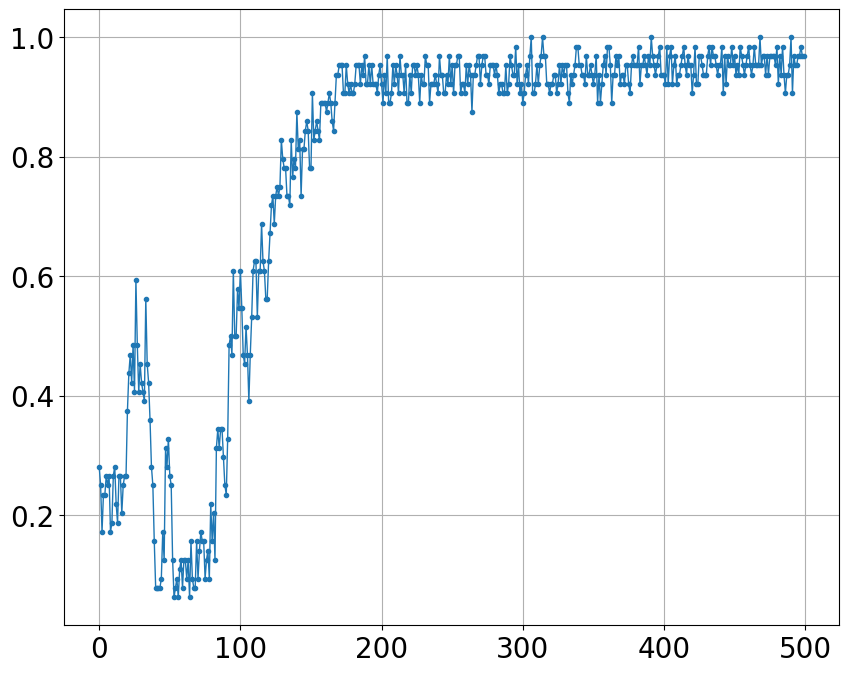

In [23]:
C.fit(data_train.vectors,data_train.targets,epochs=500)
plot(C.training_accuracies,'.-',lw=1)

In [24]:
print('train: ', C.percent_correct(data_train.vectors,data_train.targets))
print('test: ', C.percent_correct(data_test.vectors,data_test.targets))

train:  0.9516128897666931
test:  0.944444477558136


In [25]:
C=BackProp([Input(shape=(13,)), Dense(features=5), ReLU(), Dense(features=3)], learning_rate=0.001)


                             NeuralNetwork Summary                              
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ path     ┃ module        ┃ inputs        ┃ outputs      ┃ params             ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│          │ NeuralNetwork │ float32[1,13] │ float32[1,3] │                    │
├──────────┼───────────────┼───────────────┼──────────────┼────────────────────┤
│ layers_0 │ Dense         │ float32[1,13] │ float32[1,5] │ bias: float32[5]   │
│          │               │               │              │ kernel:            │
│          │               │               │              │ float32[13,5]      │
│          │               │               │              │                    │
│          │               │               │              │ 70 (280 B)         │
├──────────┼───────────────┼───────────────┼──────────────┼────────────────────┤
│ layers_2 │ Dense         

# digits

In [26]:
images=image.load_images('images/digits')

[eight]: 174 files found
[nine]: 180 files found
[three]: 183 files found
[one]: 182 files found
[zero]: 178 files found
[seven]: 179 files found
[two]: 177 files found
[six]: 181 files found
[five]: 182 files found
[four]: 181 files found


In [27]:
data=image.images_to_vectors(images)

1797 vectors of length 64
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p59', 'p60', 'p61', 'p62', 'p63'  (64 features)
Target values given.
Target names: 'eight', 'nine', 'three', 'one', 'zero', 'seven', 'two', 'six', 'five', 'four'
Mean:  [0.00000000e+00 4.71341124e+00 8.25158598e+01 1.88401224e+02
 1.88589872e+02 9.17840846e+01 2.15581525e+01 2.04785754e+00
 8.51419032e-02 3.14913745e+01 1.65203116e+02 1.90677240e+02
 1.63504174e+02 1.30023372e+02 2.92036728e+01 1.70005565e+00
 4.22927101e-02 4.11185309e+01 1.57575960e+02 1.11080690e+02
 1.12814691e+02 1.24173066e+02 2.82609905e+01 7.82971619e-01
 1.66944908e-02 3.90011130e+01 1.44642181e+02 1.40286589e+02
 1.58007791e+02 1.20022816e+02 3.66889260e+01 3.33889816e-02
 0.00000000e+00 3.70083472e+01 1.21928770e+02 1.44347245e+02
 1.63978854e+02 1.39081803e+02 4.60222593e+01 0.00000000e+00
 1.37451308e-01 2.49860879e+01 1.09460768e+02 1.14961046e+02
 1.21993879e+02 1.30974958e+02 5.47762938e+01 4.24040067e-01
 1.13522538e-01 1.

In [28]:
data_train,data_test=split(data,test_size=0.3)

Original vector shape:  (1797, 64)
Train vector shape:  (1257, 64)
Test vector shape:  (540, 64)


In [29]:
C=BackProp(
    [Input(shape=(64,)), 
     Dense(features=15), 
     ReLU(), 
     Dense(features=15), 
     ReLU(), 
     Dense(features=10)], learning_rate=0.001)


                             NeuralNetwork Summary                              
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ path     ┃ module        ┃ inputs        ┃ outputs       ┃ params            ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│          │ NeuralNetwork │ float32[1,64] │ float32[1,10] │                   │
├──────────┼───────────────┼───────────────┼───────────────┼───────────────────┤
│ layers_0 │ Dense         │ float32[1,64] │ float32[1,15] │ bias: float32[15] │
│          │               │               │               │ kernel:           │
│          │               │               │               │ float32[64,15]    │
│          │               │               │               │                   │
│          │               │               │               │ 975 (3.9 KB)      │
├──────────┼───────────────┼───────────────┼───────────────┼───────────────────┤
│ layers_2 │ Dense         

100%|████████████████████████████████████████| 500/500 [00:00<00:00, 605.91it/s]


train:  0.9960222840309143
test:  0.9074074029922485


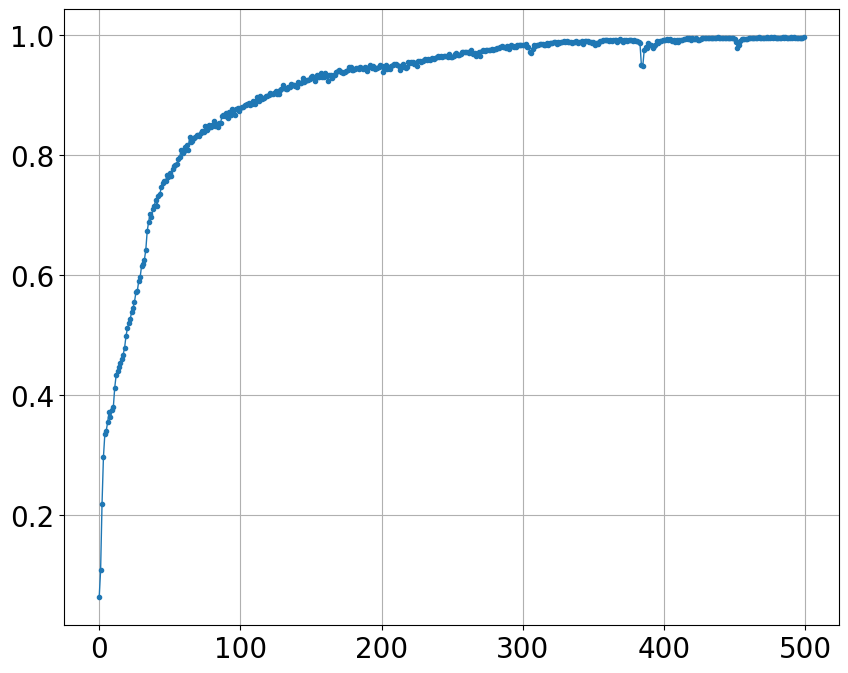

In [30]:
C.fit(data_train.vectors,data_train.targets,epochs=500)
plot(C.training_accuracies,'.-',lw=1)
print('train: ', C.percent_correct(data_train.vectors,data_train.targets))
print('test: ', C.percent_correct(data_test.vectors,data_test.targets))

# hawkins
How big are the images?
How big are the vectors?  Does this make sense given the size of the images?
Use multiple classification algorithms to classify the two Hawkins subset image sets
Which algorithms work the best?  The worst?
Are there any other issues (e.g. memory, time, etc...) that you encounter in this problem?

In [31]:
images=image.load_images('images/hawkins_bitmaps subset/clean')

Expecting a folder of target-named folders.  Found  images/hawkins_bitmaps subset/clean/Icon
[cat]: 20 files found
[bed]: 6 files found
[dog]: 20 files found
[helicopter]: 12 files found
[bus]: 5 files found
[mug]: 18 files found
[wineglass]: 5 files found


In [32]:
data=image.images_to_vectors(images)

86 vectors of length 1024
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p1019', 'p1020', 'p1021', 'p1022', 'p1023'  (1024 features)
Target values given.
Target names: 'cat', 'bed', 'dog', 'helicopter', 'bus', 'mug', 'wineglass'
Mean:  [252.03488372 252.03488372 252.03488372 ... 255.         255.
 255.        ]
Median:  [255. 255. 255. ... 255. 255. 255.]
Stddev:  [27.33702136 27.33702136 27.33702136 ...  0.          0.
  0.        ]


In [33]:
data.vectors.shape

(86, 1024)

In [34]:
data.target_names

['cat', 'bed', 'dog', 'helicopter', 'bus', 'mug', 'wineglass']

In [35]:
print(data.feature_names)

['p0', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p26', 'p27', 'p28', 'p29', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 'p36', 'p37', 'p38', 'p39', 'p40', 'p41', 'p42', 'p43', 'p44', 'p45', 'p46', 'p47', 'p48', 'p49', 'p50', 'p51', 'p52', 'p53', 'p54', 'p55', 'p56', 'p57', 'p58', 'p59', 'p60', 'p61', 'p62', 'p63', 'p64', 'p65', 'p66', 'p67', 'p68', 'p69', 'p70', 'p71', 'p72', 'p73', 'p74', 'p75', 'p76', 'p77', 'p78', 'p79', 'p80', 'p81', 'p82', 'p83', 'p84', 'p85', 'p86', 'p87', 'p88', 'p89', 'p90', 'p91', 'p92', 'p93', 'p94', 'p95', 'p96', 'p97', 'p98', 'p99', 'p100', 'p101', 'p102', 'p103', 'p104', 'p105', 'p106', 'p107', 'p108', 'p109', 'p110', 'p111', 'p112', 'p113', 'p114', 'p115', 'p116', 'p117', 'p118', 'p119', 'p120', 'p121', 'p122', 'p123', 'p124', 'p125', 'p126', 'p127', 'p128', 'p129', 'p130', 'p131', 'p132', 'p133', 'p134', 'p135', 'p136', 'p137', 'p138

In [36]:
data_train,data_test=split(data,test_size=0.3)

Original vector shape:  (86, 1024)
Train vector shape:  (60, 1024)
Test vector shape:  (26, 1024)


In [37]:
C=BackProp(
    [Input(shape=(1024,)), 
     Dense(features=15), 
     ReLU(), 
     Dense(features=15), 
     ReLU(), 
     Dense(features=7)], learning_rate=0.001)


                             NeuralNetwork Summary                              
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ path     ┃ module        ┃ inputs          ┃ outputs       ┃ params          ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│          │ NeuralNetwork │ float32[1,1024] │ float32[1,7]  │                 │
├──────────┼───────────────┼─────────────────┼───────────────┼─────────────────┤
│ layers_0 │ Dense         │ float32[1,1024] │ float32[1,15] │ bias:           │
│          │               │                 │               │ float32[15]     │
│          │               │                 │               │ kernel:         │
│          │               │                 │               │ float32[1024,1… │
│          │               │                 │               │                 │
│          │               │                 │               │ 15,375 (61.5    │
│          │               

In [38]:
C.fit(data_train.vectors,data_train.targets,epochs=1000)
plot(C.training_accuracies,'.-',lw=1)
print('train: ', C.percent_correct(data_train.vectors,data_train.targets))
print('test: ', C.percent_correct(data_test.vectors,data_test.targets))

  0%|                                                  | 0/1000 [00:00<?, ?it/s]


IndexError: list index out of range

In [ ]:
C=NaiveBayes()
data_train,data_test=split(data,test_size=0.3)

C.fit(data_train.vectors,data_train.targets)
print('train: ', C.percent_correct(data_train.vectors,data_train.targets))
print('test: ', C.percent_correct(data_test.vectors,data_test.targets))

In [ ]:
C=CSC()
data_train,data_test=split(data,test_size=0.3)

C.fit(data_train.vectors,data_train.targets)
print('train: ', C.percent_correct(data_train.vectors,data_train.targets))
print('test: ', C.percent_correct(data_test.vectors,data_test.targets))

In [ ]:
C=kNearestNeighbor(k=5)
data_train,data_test=split(data,test_size=0.3)

C.fit(data_train.vectors,data_train.targets)
print('train: ', C.percent_correct(data_train.vectors,data_train.targets))
print('test: ', C.percent_correct(data_test.vectors,data_test.targets))